In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Q 8.Create a bar chart between expectedLOS & Primary diagnosis.

<AxesSubplot:xlabel='ExpectedLOS', ylabel='PrimaryDiagnosis'>

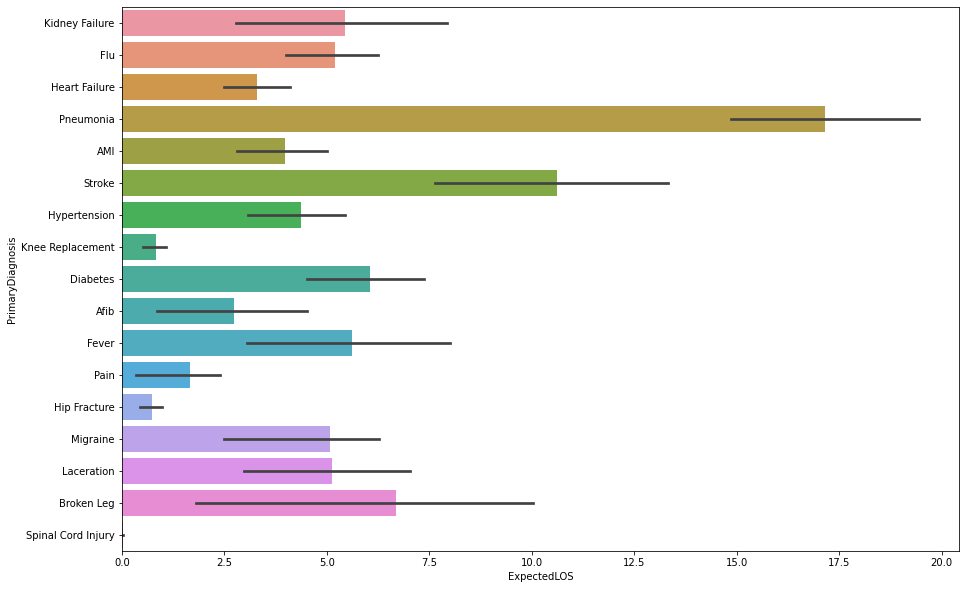

In [2]:
df=pd.read_excel('HospitalDatabase.xlsx', 'ReAdmissionRegistry')
df
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='ExpectedLOS', y='PrimaryDiagnosis', estimator=np.cov)

## Q 9. Get the list of patient ID's which are not there in ReadmissionRegistry.

In [3]:
R=pd.read_excel('HospitalDatabase.xlsx', 'ReAdmissionRegistry')
p=pd.read_excel('HospitalDatabase.xlsx', 'Patients')
j= p.merge(R, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
print(j['PatientID'].tolist())

[4, 135, 145, 189, 200, 224, 234, 374, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 414, 501, 562, 599, 690, 691, 704, 726, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 9

## Q 10. Create a boxplot on ExpectedLOS by taking service into account.

<AxesSubplot:xlabel='Service', ylabel='ExpectedLOS'>

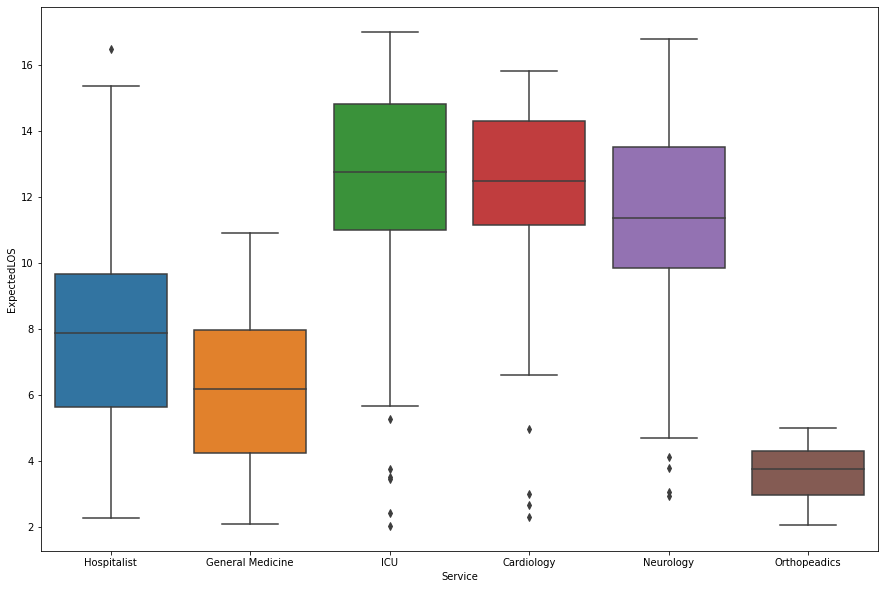

In [4]:
df=pd.read_excel('HospitalDatabase.xlsx', 'ReAdmissionRegistry')
df
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='Service',y='ExpectedLOS')

## Q 28.Which reason of visit has maximum mortality rate.

In [10]:
workbook_url = 'HospitalDatabase.xlsx'
EDVisits_df = pd.read_excel(workbook_url,sheet_name='EDVisits')
EDVisits_df
workbook_url = 'HospitalDatabase.xlsx'
Discharges_df = pd.read_excel(workbook_url,sheet_name='Discharges')
max_mortality_val=Discharges_df['ExpectedMortality'].max()
max_mortality_val
EDVisits_df['visit'] = (EDVisits_df['ReasonForVisit'])
EDVisits_df
merged = EDVisits_df.merge(Discharges_df, left_on='PatientID', right_on='PatientID')
merged
df = merged.loc[(merged['ExpectedMortality'] == max_mortality_val)]
df['ReasonForVisit']


482    Pneumonia
Name: ReasonForVisit, dtype: object

## Answer : Therefore Pneumonia has the maximum mortality rate.

## Q 29. Calculate average LOS.

In [15]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
patient_sum=df['PatientID'].value_counts(ascending=False)
discharge_date=df['DischargeDate'].value_counts(ascending=False)
admission_date=df['AdmissionDate'].value_counts(ascending=False)
df_Difference=(df['DischargeDate'] - df['AdmissionDate']).dt.days
#print(df_Difference.sum())
#print(patient_sum.sum())
print(df_Difference.sum() / patient_sum.sum())

9.534722222222221


## Answer: Avg LOS = 9.53

## Q 30. Which patient id has most entries in readmission registry.

In [17]:
df=pd.read_excel('HospitalDatabase.xlsx', 'ReAdmissionRegistry')
df
df['ReadmissionFlag'].idxmax()

1

## Answer: The patient id = 1 has most entries in readmission registry.

## Q 31. Find the count of White Spanish Male.

In [18]:
workbook_url = 'HospitalDatabase.xlsx'
df= pd.read_excel(workbook_url,sheet_name='Patients')
df
df=((df['Language'] == 'Spanish') & (df['Gender'] == 'Male') & (df['Race'] == 'White')).sum()
print(df)

15


## Q 32. If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

In [73]:
p=pd.read_excel('HospitalDatabase.xlsx', 'Patients')
df1= df.loc[(df['Gender'] == 'Male')]
df2= df.loc[(df['Gender'] == 'Female')]
df1["NewName"]= "Mr." + df["FirstName"] +" " + df["LastName"]
df2["NewName"]= "Mrs." + df["FirstName"] +" " + df["LastName"]
df3= df1.append(df2)
df3["NewName"]

C:\Users\sanja\AppData\Local\Temp\ipykernel_53540\3789791311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["NewName"]= "Mr." + df["FirstName"] +" " + df["LastName"]
C:\Users\sanja\AppData\Local\Temp\ipykernel_53540\3789791311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["NewName"]= "Mrs." + df["FirstName"] +" " + df["LastName"]
C:\Users\sanja\AppData\Local\Temp\ipykernel_53540\3789791311.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

0              Mr.Lanni Sue
1              Mr.Far Myers
2        Mr.Devlin  Michael
3          Mr.Carmine Texas
4             Mr.Tann  Bama
               ...         
914      Mrs.Jerrilyn Dyson
915      Mrs.Kaylil Baldack
916     Mrs.Velvet Bushnell
917          Mrs.Kiri Allom
918    Mrs.Champlin Bulford
Name: NewName, Length: 945, dtype: object

## Q.33 Using a bar chart, which Service had the lowest count of Expected Mortality?

<AxesSubplot:xlabel='Service', ylabel='ExpectedMortality'>

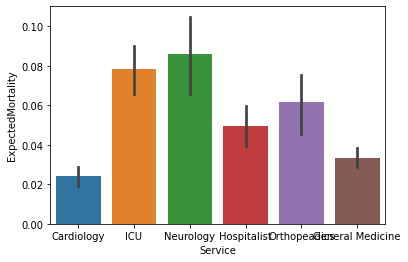

In [19]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
df
sns.barplot(data = df,x = 'Service',
            y = 'ExpectedMortality', estimator=np.cov) 

## Answer : Cardiology has the lowest expected mortality.

## Q.34 np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [20]:
arr = np.reshape(np.arange(1,31),(6,5))
print('Original arrays:',arr)

Original arrays: [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


In [21]:
result = arr[[2,2,3,3],[0,1,0,1]]
print('Sliced elements:',result)

Sliced elements: [11 12 16 17]


## Q 35. np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20.

In [22]:
arr=np.reshape(np.arange(1,31),(6,5))
print('Original arrays:',arr)

Original arrays: [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


In [23]:
result=arr[[0,1,2,3],[1,2,3,4]]
print('Sliced elements:',result)

Sliced elements: [ 2  8 14 20]


## Q 36.Create a correlation matrix on EDVisits.

In [25]:
df=pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
df
df.corr().round(3)

,EDVisitID,PatientID,Acuity
EDVisitID,1.000,0.975,0.006
PatientID,0.975,1.000,0.004
Acuity,0.006,0.004,1.000


## Bonus Question

In [26]:
f=pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
df
df = df.corr()
df.style.background_gradient(cmap='coolwarm')

,EDVisitID,PatientID,Acuity
EDVisitID,1.000000,0.975477,0.005813
PatientID,0.975477,1.000000,0.003545
Acuity,0.005813,0.003545,1.000000


## Q 37. Write a function to print all the upper case letter of a given sentence.

In [27]:
p= 'Hello everyone welcome to Pyathon Hackathon'
p.upper()

'HELLO EVERYONE WELCOME TO PYATHON HACKATHON'

## Q 38.Number of patients on 'Transfer' based on primary diagnosis.

In [28]:
df=pd.read_excel('HospitalDatabase.xlsx', 'ReAdmissionRegistry')
df
df.groupby('PrimaryDiagnosis')['DischargeDisposition'].apply(lambda x: (x=='Transfer').sum()).reset_index(name='count')

,PrimaryDiagnosis,count
0,AMI,0
1,Afib,1
2,Broken Leg,0
3,Diabetes,7
4,Fever,0
5,Flu,2
6,Heart Failure,9
7,Hip Fracture,0
8,Hypertension,0
9,Kidney Failure,0


## Answer: These are the number of patients on 'Transfer' based on primary diagnosis.

## Q 39.Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [29]:
p=pd.read_excel('HospitalDatabase.xlsx', 'Patients')
e=pd.read_excel('HospitalDatabase.xlsx', 'EDUnique')
j = p[["PatientID", "FirstName","LastName","DateOfBirth"]].merge(e[["PatientID",  "ReasonForVisit" ]], on = "PatientID", how = "left")
j.to_excel("Results.xlsx", index = False)
j
j[j['ReasonForVisit']=='Migraine']

,PatientID,FirstName,LastName,DateOfBirth,ReasonForVisit
1,2,Far,Myers,1985-11-15 02:08:42.090,Migraine
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
11,12,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
13,14,Gan,Yu,1970-06-02 06:22:54.675,Migraine
21,22,Joesph,Long,1979-12-04 16:45:56.080,Migraine
...,...,...,...,...,...
896,897,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
907,908,Knox,Group,1975-08-25 22:27:50.177,Migraine
909,910,Kuvalis,Coupland,1986-05-23 19:23:27.752,Migraine
914,915,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Migraine


## Q 40.Plot a graph showing the count of patients for the reason visited the hospital.

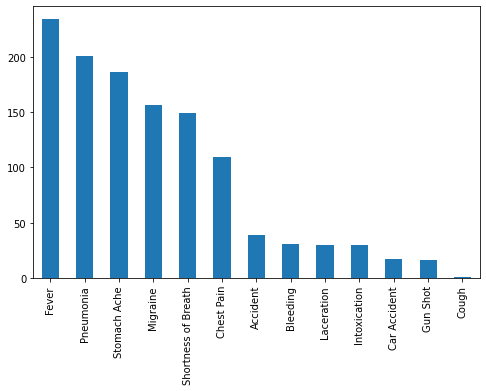

In [30]:
df=pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
df
plt.figure(figsize=(8,5))
#sns.countplot(data=df,y='ReasonForVisit')
df['ReasonForVisit'].value_counts().plot(kind='bar');

## Q 41.Find the visit type with maximum 'No Show'.

In [31]:
df=pd.read_excel('HospitalDatabase.xlsx', 'AmbulatoryVisits')
df
df.groupby('VisitType')['VisitStatus'].apply(lambda x: (x=='No Show').sum()).reset_index(name='count')
#df[df['VisitStatus']=='No Show']
#df['VisitType'].value_counts()

,VisitType,count
0,Follow Up,41
1,New,0
2,Physical,39
3,Telemedicine,74


In [32]:
## Answer : The visit type Telemedicine has the maximum 'No Show'.

## Q 42.Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

In [33]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Providers')
df
df.loc[(df['ProviderSpecialty']=='Surgery'),:]

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


## Q 43 In question 34, when the value is less than 6, print as -1,else print 99.

In [34]:
arr = np.reshape(np.arange(1,31),(6,5))
print('Original arrays:',arr)

Original arrays: [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


In [58]:
new_arr_ele = np.reshape(np.arange(1,31),(6,5))
result = np.where(new_arr_ele < 6, -1, 99)
print("Replace value:",result)

Replace value: [[-1 -1 -1 -1 -1]
 [99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]]


## Bonus question

## Question 1:No of providers in each specialty


In [59]:

df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
df['ProviderSpecialty'].value_counts()

PrimaryCare    16
Pediatrics      9
Cardiology      8
Surgery         7
Name: ProviderSpecialty, dtype: int64

## Question 2: Patient with maximum pulse pressure(SBP-DBP)


In [60]:

data = pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
data['PulsePressure'] = data['BloodPressureSystolic']-data['BloodPressureDiastolic']
PatientPP = data['PulsePressure'].max()
data.loc[(data['PulsePressure'] == PatientPP)]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus,PulsePressure
195,847,865,35,2019-03-25,2019-03-12 10:02:35.807,4,Follow Up,188.0,117.850163,60.329856,Completed,70.149837


## Bonus Q 3. Show all the Male, Black/African-American, above the age of 55 who visit the hospital.

In [61]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2022 - Patients_df['Year']
Patients_df

df = Patients_df.loc[(Patients_df['Age'] > 55) & 
              (Patients_df['Race'] == 'Black/African-American') & (Patients_df['Gender']== 'Male')]
df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age
81,83,Charmine,Bernardt,1964-07-28 15:49:41.229,Male,Black/African-American,Spanish,1964,58
84,86,Aurore,Harrild,1964-07-05 10:50:46.122,Male,Black/African-American,Spanish,1964,58
89,46,Ilise,de,1965-10-20 06:23:48.785,Male,Black/African-American,Spanish,1965,57
96,97,Skippie,Breagan,1966-12-01 19:45:47.561,Male,Black/African-American,Spanish,1966,56
101,102,Gipsy,Frankton,1964-06-13 06:52:25.324,Male,Black/African-American,Spanish,1964,58
...,...,...,...,...,...,...,...,...,...
927,928,Giovanni,McCluney,1961-08-18 15:37:17.632,Male,Black/African-American,English,1961,61
928,929,Ediva,MacTeague,1963-04-05 17:42:15.238,Male,Black/African-American,English,1963,59
931,932,Kellsie,MacTeague,1966-06-28 14:49:50.758,Male,Black/African-American,English,1966,56
935,936,Philippa,Slocum,1963-07-21 21:19:53.583,Male,Black/African-American,English,1963,59


## Answer : Statiscally Out of the total no of 1000 Patients, 97 patients are Male, Black/African-American, above the age of 55 who visit the hospital.

## Bonus Q 4.Display total count of patients service wise and gender wise separately.

In [63]:
df=pd.read_excel("HospitalDatabase .xlsx",'ReAdmissionRegistry')
df['Service'].value_counts()

General Medicine    263
ICU                 151
Hospitalist         101
Cardiology           95
Neurology            65
Orthopeadics         45
Name: Service, dtype: int64

In [65]:
df=pd.read_excel("HospitalDatabase .xlsx")
df['Gender'].value_counts()

Male      537
Female    408
Name: Gender, dtype: int64

## Bonus Q 5: Retrieve patient ids with abnormal BP range separtely (normal range DBP = 80, SBP = 120)

In [68]:
# Retrieve the rows where DBP<80
df=pd.read_excel("HospitalDatabase .xlsx",'AmbulatoryVisits')
df
df['BloodPressureDiastolic']<80

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Name: BloodPressureDiastolic, Length: 950, dtype: bool

In [69]:
# Retrieve the rows where SBP<120
df['BloodPressureSystolic']<120

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Name: BloodPressureSystolic, Length: 950, dtype: bool

## Bonus Q 5. Find the age ranges for patients based on primary Diagnosis.

In [84]:
workbook_url = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(workbook_url,sheet_name='Patients')
Patients_df
Patients_df['DateOfBirth'] = pd.to_datetime(Patients_df['DateOfBirth'])
Patients_df['Year'] = Patients_df['DateOfBirth'].dt.year
Patients_df['Age'] = 2022 - Patients_df['Year']
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,62
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,60
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,59


In [82]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Patients')
df1=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
df2 = df.merge(df1, how = 'outer',indicator=True)
df2


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,_merge
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,389.0,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,both
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,635.0,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,both
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,606.0,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,both
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,587.0,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
957,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
958,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
959,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only


In [81]:
Discharges_df = pd.read_excel(workbook_url,sheet_name='Discharges')
Discharges_df

ValueError: Could not interpret input 'Age'

<Figure size 1080x504 with 0 Axes>

## Q4 